3.0
   Nombre  Edad
0     Ana    23
1    Luis    34
2  Carlos    29


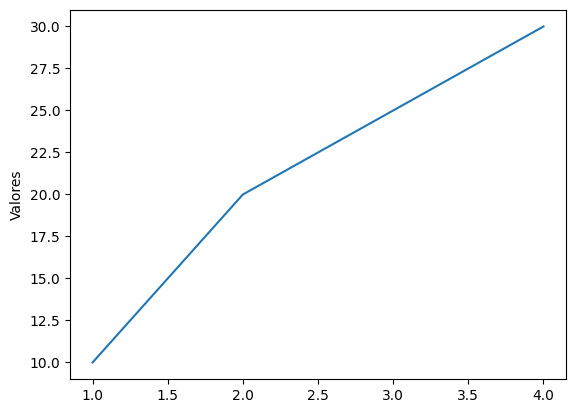

In [ ]:
import numpy as np
arr = np.array([1, 2, 3, 4, 5])
print(np.mean(arr))  # Promedio del array

import pandas as pd
data = {'Nombre': ['Ana', 'Luis', 'Carlos'], 'Edad': [23, 34, 29]}
df = pd.DataFrame(data)
print(df)

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.ylabel('Valores')
plt.show()

10
[ 0.          0.71428571  1.42857143  2.14285714  2.85714286  3.57142857
  4.28571429  5.          5.71428571  6.42857143  7.14285714  7.85714286
  8.57142857  9.28571429 10.        ]


Ingrese la distancia inicial entre la moto y el policía: 1
Ingrese la velocidad de la moto (m/s): 15
Ingrese la aceleración del policía (m/s²): 3
El tiempo de intersección aproximado es: 10.066228 segundos


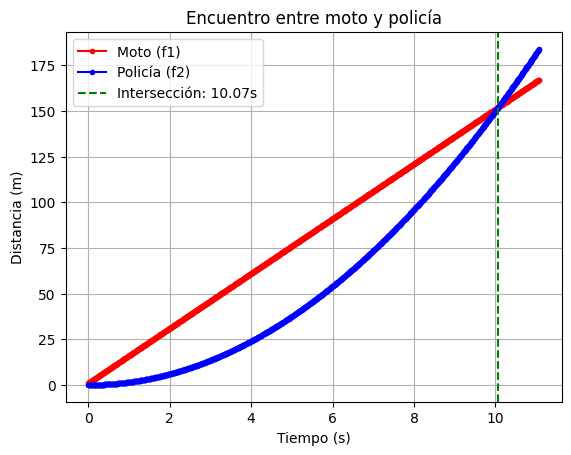

In [29]:
while True:
    try:
        b = int(input("Ingrese la distancia inicial entre la moto y el policía: "))
        m = int(input("Ingrese la velocidad de la moto (m/s): "))
        n = int(input("Ingrese la aceleración del policía (m/s²): "))
        if n == 0:
            raise ValueError("La aceleración del policía no puede ser cero.")
        break
    except ValueError as e:
        print(f"Error: {e}. Intente de nuevo.")

f1 = lambda t: m * t + b
f2 = lambda t: 0.5 * n * (t**2)
dif = lambda t: f1(t) - f2(t)

def raiz_valor_medio(f, a, b, tol=1e-6):
    if f(a) * f(b) > 0:
        print("El teorema del valor medio no garantiza una raíz en este intervalo.")
        return None

    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0 or c <= 0:
            return c if c > 0 else None
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c

    return (a + b) / 2 if (a + b) / 2 > 0 else None

tiempo_inicial = 0
tiempo_interseccion = raiz_valor_medio(dif, tiempo_inicial, 100)

if tiempo_interseccion is not None:
    tiempo_final = tiempo_interseccion * 1.1
    print(f"El tiempo de intersección aproximado es: {tiempo_interseccion:.6f} segundos")

    x = np.linspace(tiempo_inicial, tiempo_final, 1000)
    plt.plot(x, f1(x), 'r.-', label='Moto (f1)')
    plt.plot(x, f2(x), 'b.-', label='Policía (f2)')
    plt.axvline(x=tiempo_interseccion, color='g', linestyle='--', label=f'Intersección: {tiempo_interseccion:.2f}s')
    plt.title("Encuentro entre moto y policía")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Distancia (m)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se pudo encontrar una intersección en el intervalo de tiempo dado.")


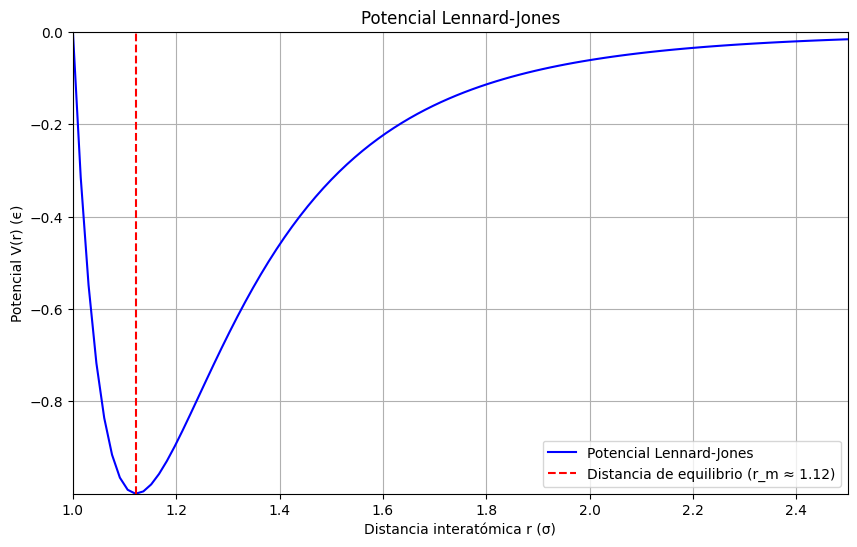

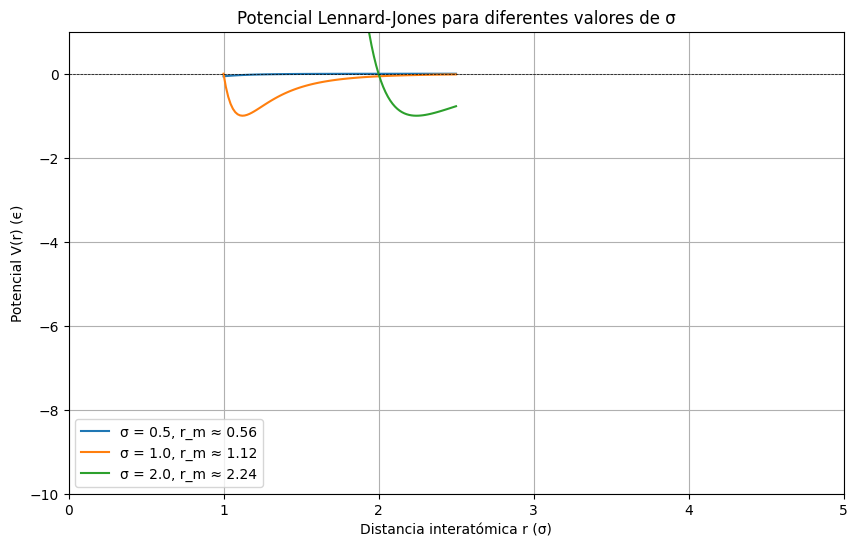

In [30]:
def potencial_lj(r, epsilon, sigma):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

sigma = 1.0
epsilon = 1.0

r = np.linspace(sigma, 2.5 * sigma, 100)
V = potencial_lj(r, epsilon, sigma)

r_m = 2 ** (1 / 6) * sigma

plt.figure(figsize=(10, 6))
plt.plot(r, V, label='Potencial Lennard-Jones', color='blue')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(r_m, color='red', linestyle='--', label=f'Distancia de equilibrio (r_m ≈ {r_m:.2f})')
plt.xlim(sigma, 2.5 * sigma)
plt.ylim(np.min(V), 0)
plt.title("Potencial Lennard-Jones")
plt.xlabel("Distancia interatómica r (σ)")
plt.ylabel("Potencial V(r) (ϵ)")
plt.grid()
plt.legend()
plt.show()

sigma_values = [0.5, 1.0, 2.0]
plt.figure(figsize=(10, 6))

for sigma in sigma_values:
    V = potencial_lj(r, epsilon, sigma)
    r_m = 2 ** (1 / 6) * sigma
    plt.plot(r, V, label=f'σ = {sigma}, r_m ≈ {r_m:.2f}')

plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.xlim(0, 5)
plt.ylim(-10, 1)
plt.title("Potencial Lennard-Jones para diferentes valores de σ")
plt.xlabel("Distancia interatómica r (σ)")
plt.ylabel("Potencial V(r) (ϵ)")
plt.grid()
plt.legend()
plt.show()
